<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#支持向量机" data-toc-modified-id="支持向量机-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>支持向量机</a></span><ul class="toc-item"><li><span><a href="#对偶问题" data-toc-modified-id="对偶问题-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>对偶问题</a></span></li><li><span><a href="#对偶空间优化问题" data-toc-modified-id="对偶空间优化问题-1.2"><span class="toc-item-num">1.2&nbsp;&nbsp;</span>对偶空间优化问题</a></span></li><li><span><a href="#例子" data-toc-modified-id="例子-1.3"><span class="toc-item-num">1.3&nbsp;&nbsp;</span>例子</a></span></li><li><span><a href="#高斯核函数高维空间投影" data-toc-modified-id="高斯核函数高维空间投影-1.4"><span class="toc-item-num">1.4&nbsp;&nbsp;</span>高斯核函数高维空间投影</a></span></li></ul></li></ul></div>

# 支持向量机

## 对偶问题

最小化问题转换为最小最大化问题。
演示如何通过第二步最大化来代替约束条件。


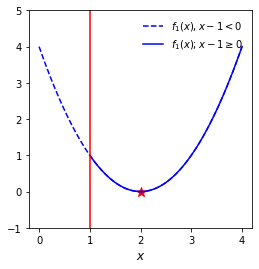

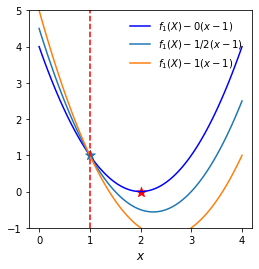

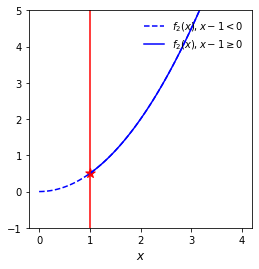

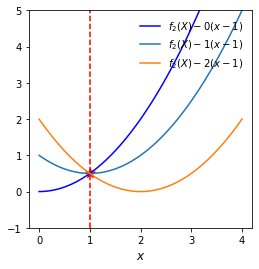

In [1]:
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np

def f1(X):
    return X*X-4*X+4

def f2(X):
    return 1/2*X*X

def g1(X, alpha):
    return f1(X) - alpha*(X-1)

def g2(X, alpha):
    return f2(X) - alpha*(X-1)


f=f1
g=g1
m=2
i=1

plt.figure(figsize=(4,4))
plt.plot(np.linspace(0,4,100),f(np.linspace(0,4,100)), label=r"$f_%d(x), x-1 < 0$"%i, color="blue", linestyle="--")
plt.plot(np.linspace(1,4,100),f(np.linspace(1,4,100)), label=r"$f_%d(x); x-1 \geq 0$"%i, color="blue")
plt.xlabel("$x$", fontsize="large")
plt.plot([1,1],[-1,8], color="red")
plt.scatter([m],[f(m)], s=100, marker="*", color="red")
plt.legend(frameon=False,loc="upper right")
plt.ylim((-1,5))
plt.show()


plt.figure(figsize=(4,4))
plt.plot(np.linspace(0,4,100),g(np.linspace(0,4,100), 0), label=r"$f_%d(X) - 0 (x-1)$"%i, color="blue")
plt.plot(np.linspace(0,4,100),g(np.linspace(0,4,100), 1/2), label=r"$f_%d(X) - 1/2 (x-1)$"%i)
plt.plot(np.linspace(0,4,100),g(np.linspace(0,4,100), 1), label=r"$f_%d(X) - 1 (x-1)$"%i)
plt.xlabel("$x$", fontsize="large")
plt.plot([1,1],[-1,8], color="red", linestyle="--")
plt.scatter([1],[1], s=100, marker="*")
plt.scatter([m],[f(m)], s=100, marker="*", color="red")
plt.legend(frameon=False,loc="upper right")
plt.ylim((-1,5))
plt.show()


f=f2
g=g2
m=1
i=2

plt.figure(figsize=(4,4))
plt.plot(np.linspace(0,4,100),f(np.linspace(0,4,100)), label=r"$f_%d(x), x-1 < 0$"%i, color="blue", linestyle="--")
plt.plot(np.linspace(1,4,100),f(np.linspace(1,4,100)), label=r"$f_%d(x), x-1 \geq 0$"%i, color="blue")
plt.xlabel("$x$", fontsize="large")
plt.plot([1,1],[-1,8], color="red")
plt.scatter([m],[f(m)], s=100, marker="*", color="red")
plt.legend(frameon=False,loc="upper right")
plt.ylim((-1,5))
plt.show()


plt.figure(figsize=(4,4))
plt.plot(np.linspace(0,4,100),g(np.linspace(0,4,100), 0), label=r"$f_%d(X) - 0 (x-1)$"%i, color="blue")
plt.plot(np.linspace(0,4,100),g(np.linspace(0,4,100), 1), label=r"$f_%d(X) - 1 (x-1)$"%i)
plt.plot(np.linspace(0,4,100),g(np.linspace(0,4,100), 2), label=r"$f_%d(X) - 2 (x-1)$"%i)
plt.xlabel("$x$", fontsize="large")
plt.plot([1,1],[-1,8], color="red", linestyle="--")
plt.scatter([m],[f(m)], s=100, marker="*", color="red")
plt.legend(frameon=False,loc="upper right")
plt.ylim((-1,5))
plt.show()



## 对偶空间优化问题
对偶空间的优化问题为
$$
\min \frac{1}{2} \sum_i\sum_j \alpha_i \alpha_j y_i y_j \kappa(x_i, x_j) -\sum_i \alpha_i \\
\sum_i y_i \alpha_i = 0 \\
0 \le \alpha_i \le C
$$

可以看出
* 对于同一类事例，$y_i y_j \kappa(x_i, x_j)>0$，支持向量是稀疏的
* 对于不同类事例，$y_i y_j \kappa(x_i, x_j)<0$，支持向量是紧凑的

决策函数为$f(x) = \sum_i \alpha_i y_i \kappa(x, x_i) + b$

* 非支持向量 $\alpha = 0$, $y_i f(x_i) > 1$
* 支持向量
    * 边界上 $0 < \alpha < C$, $y_i f(x_i) = 1$
    * 边界外 $\alpha = C$, $y_i f(x_i) < 1$


## 例子

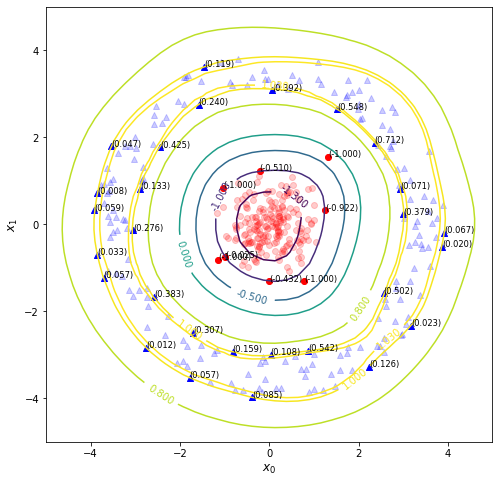

In [2]:
from sklearn.svm import SVC
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
%matplotlib inline
import numpy as np

N1=200
N2=200
X1 = 0.5*np.random.randn(N1, 2)
y1 = np.zeros(N1)
theta = np.random.rand(N2)*2*np.pi
R = np.random.rand(N2)+3.
X2 = (R*np.array([np.sin(theta), np.cos(theta)])).transpose()
y2 = np.ones(N2)

X=np.concatenate((X1, X2))
y=np.concatenate((y1, y2))

gamma=0.5
svc=SVC(kernel="rbf", gamma = gamma, C=1)
svc.fit(X,y)
sv = svc.support_
dual_coef = svc.dual_coef_
lim=5
xx,yy=np.meshgrid(np.linspace(-lim,lim,40),
                  np.linspace(-lim,lim,40))
zz =svc.decision_function(np.c_[xx.ravel(), yy.ravel()]).reshape(xx.shape)
plt.figure(figsize=(8,8))
plt.scatter(X[y==1, 0],X[y==1, 1],marker='^', color="blue", alpha=0.2)
plt.scatter(X[sv][y[sv]==1, 0],X[sv][y[sv]==1, 1],marker='^', color="blue")
plt.scatter(X[y==0, 0],X[y==0, 1],marker='o', color="red", alpha=0.2)
plt.scatter(X[sv][y[sv]==0, 0],X[sv][y[sv]==0, 1],marker='o', color="red")

sv_decison = svc.decision_function(X[sv])
for sv, c, d in zip(svc.support_, dual_coef[0], sv_decison):
    plt.text(X[sv][0], X[sv][1], "(%.3f)"%(c), fontsize="small")

#plt.text(0,4, r"$\gamma=1/(2\sigma^2)=0.5$", fontsize="large")
plt.xlabel("$x_0$", fontsize="large")
plt.ylabel("$x_1$", fontsize="large")
cs=plt.contour(xx, yy, zz, levels=[-1.3, -1, -0.5, 0, 0.8, 1, 1.03])
#plt.legend()
plt.clabel(cs, inline=True)
plt.show()


在蓝色点外围出现了支持向量（如果修改数据分布，可能不会出现）。那是因为，蓝色点内部的支持向量不能足够产生$f(x_i)>1$，于是必须在外围补充支持向量，以使得对全部蓝色数据点都有$f(x_i)>1$。

## 高斯核函数高维空间投影

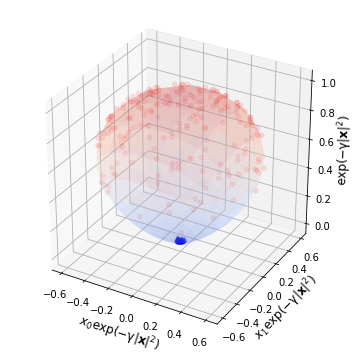

In [3]:
fig = plt.figure(figsize=(5,5))
ax = fig.add_subplot(111, projection='3d')

rho1 = np.exp(-gamma*np.square(X1).sum(axis=1))
rho2 = np.exp(-gamma*np.square(X2).sum(axis=1))
rhosv0 = np.exp(-gamma*np.square(X[sv][y[sv]==0]).sum(axis=1))
rhosv1 = np.exp(-gamma*np.square(X[sv][y[sv]==1]).sum(axis=1))
ax.scatter(rho1*X1[:,0], rho1*X1[:,1], rho1, marker='o', color="red", alpha=0.1)
ax.scatter(rho2*X2[:,0], rho2*X2[:,1], rho2, marker='^', color="blue", alpha=0.1)
ax.scatter(rhosv0*X[sv][y[sv]==0][:,0], rhosv0*X[sv][y[sv]==0][:,1], rhosv0, marker='o', color="red")
ax.scatter(rhosv1*X[sv][y[sv]==1][:,0], rhosv1*X[sv][y[sv]==1][:,1], rhosv1, marker='^', color="blue")
ax.set_xlabel(r"$x_0 \rm{exp}(-\gamma|\mathbf{x}|^2)$", fontsize="large")
ax.set_ylabel(r"$x_1 \rm{exp}(-\gamma|\mathbf{x}|^2)$", fontsize="large")
ax.set_zlabel(r"$\rm{exp}(-\gamma|\mathbf{x}|^2)$", fontsize="large")

xyxy=np.array([xx.ravel(), yy.ravel()]).transpose()
rho_xyxy = np.exp(-gamma*np.square(xyxy).sum(axis=1))
rho_xyxy = rho_xyxy.reshape(xx.shape)

from matplotlib import cm
ax.plot_surface(rho_xyxy*xx, rho_xyxy*yy, rho_xyxy, alpha=0.2, cmap=cm.coolwarm)

plt.tight_layout()
plt.show()